Mauricio Tombini and Victor M. Zavala 2016 

University of Wisconsin-Madison 

In [48]:
# Loading packages:

using JuMP 
using Distributions 
using Ipopt
#using PyPlot 
using Gadfly
set_default_plot_size(20cm, 15cm)

In [3]:
# Generate random data: 
N = 1000
srand(0)
μ = 0; σ = 2; 
d = Normal(μ,σ)
R = rand(d,N);

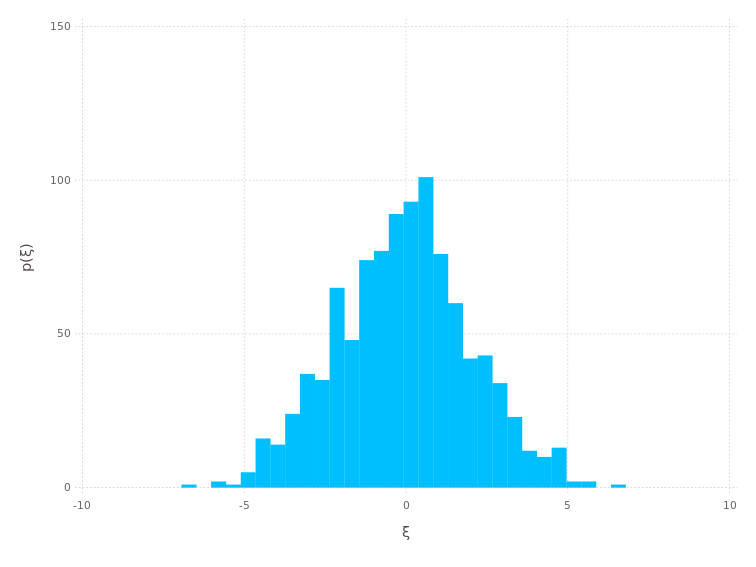

In [47]:
# Plotting:
p = plot(x = R, Geom.histogram(bincount = 30),Guide.XLabel("ξ"), Guide.YLabel("p(ξ)"))
draw(PDF("myplot.pdf", 6inch, 3inch), p)
p
#plt[:hist](R, bins = 30)
#grid("on")
#xlabel(L"\xi")
#ylabel(L"p(\xi)")
#savefig("ex1data.pdf")

## Ex1Gauss

In [30]:
# ex1gauss.mod 
function ex1GaussModel(xip)
    m = Model(solver=IpoptSolver(print_level=0))
    @variable(m, x)
    @objective(m, Min, (x-xip)^2 - x*xip)
    solve(m)
    obj = getobjectivevalue(m)
    x = getvalue(x)
    return obj,x
end
        
# solve problems with data points
solex1gauss = zeros(N)
solxex1gauss = zeros(N)

for i=1:N 
    (solex1gauss[i], solxex1gauss[i]) = ex1GaussModel(R[i])
end 

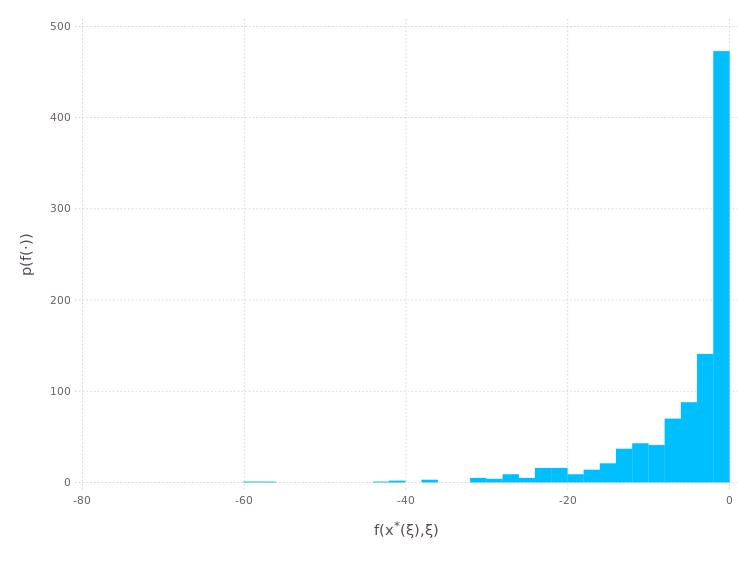

In [31]:
# Plotting: 

sol = solex1gauss;
solx = solxex1gauss;
p = plot(x = sol, Geom.histogram(bincount = 30),Guide.XLabel("f(x<sup>*</sup>(ξ),ξ)"), Guide.YLabel("p(f(⋅))"))
draw(PDF("ex1solgauss.pdf", 6inch, 3inch), p)
p
# using PyPlot
# plt[:hist](sol, bins = 30)
# grid("on")
# xlabel(L"f(x^*(\xi),\xi)")
# ylabel(L"p(f(\cdot))")
# savefig("ex1solgauss.pdf")

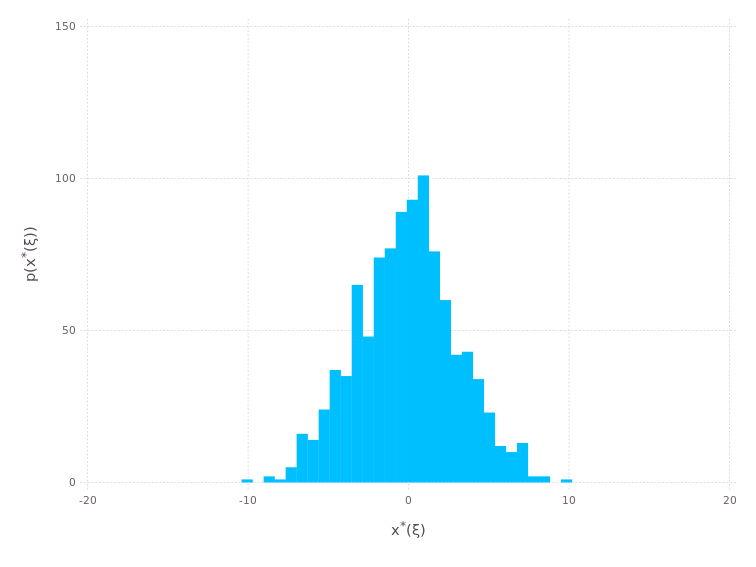

In [32]:
p = plot(x = solx, Geom.histogram(bincount = 30),Guide.XLabel("x<sup>*</sup>(ξ)"), Guide.YLabel("p(x<sup>*</sup>(ξ))"))
draw(PDF("ex1solxgauss.pdf", 6inch, 3inch), p)
p

# plt[:hist](solx, bins = 30)
# grid("on")
# xlabel(L"x^*(\xi)")
# ylabel(L"p(x^*(\xi))")
# savefig("ex1solxgauss.pdf")

## Ex1 Gauss with Constraints

In [33]:
# ex1gausscons.mod

function ex1GaussConsModel(xip)
    m = Model(solver=IpoptSolver(print_level=0))
    @variable(m, -1 <= x <= 1)
    @objective(m, Min, (x-xip)^2 - x*xip)
    
    solve(m)
    obj = getobjectivevalue(m)
    x = getvalue(x)
    
    return obj,x
end
        
# solve problems with data points
solex1gausscons = zeros(N)
solxex1gausscons = zeros(N)

for i=1:N 
    (solex1gausscons[i], solxex1gausscons[i]) = ex1GaussConsModel(R[i])
end 

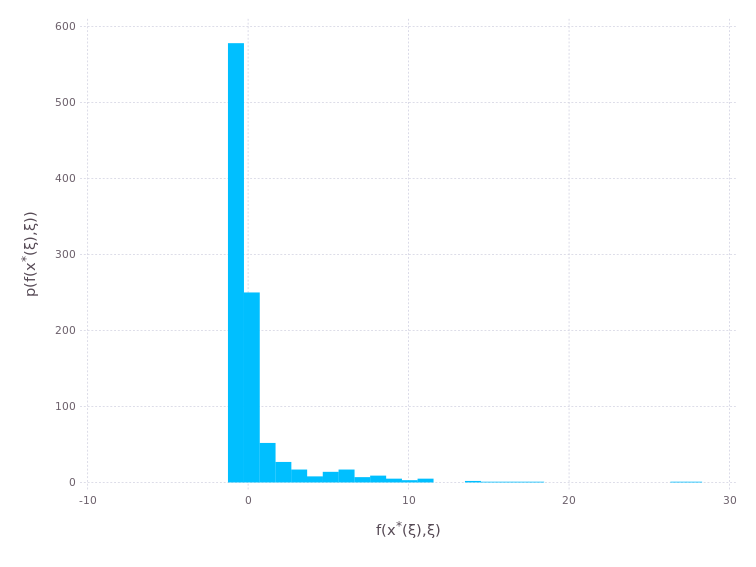

In [34]:
# Plotting: 
sol = solex1gausscons
solx = solxex1gausscons
p = plot(x = sol, Geom.histogram(bincount = 30),Guide.XLabel("f(x<sup>*</sup>(ξ),ξ)"), Guide.YLabel("p(f(x<sup>*</sup>(ξ),ξ))"))
draw(PDF("ex1solgausscons.pdf", 6inch, 3inch), p)
p

# plt[:hist](sol, bins = 30)
# grid("on")
# xlabel(L"f(x^*(\xi),\xi)")
# ylabel(L"p(f(x^*(\xi),\xi))")
# savefig("ex1solgausscons.pdf")

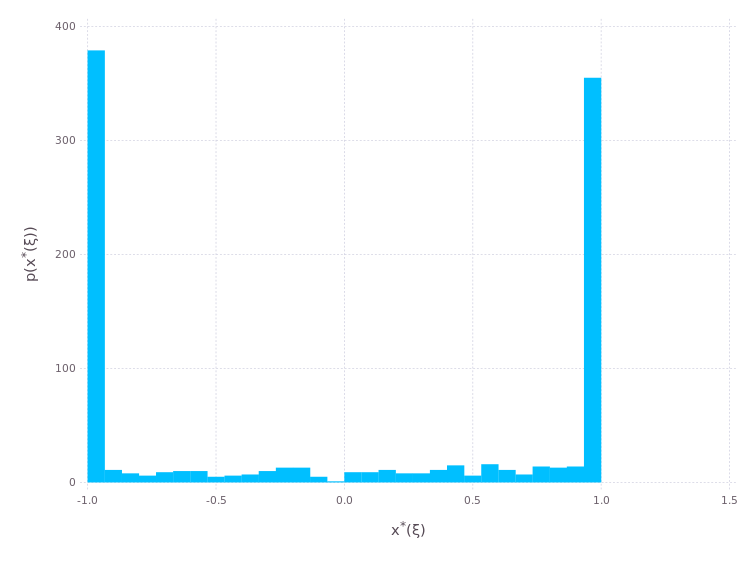

In [35]:
p = plot(x = solx, Geom.histogram(bincount = 30),Guide.XLabel("x<sup>*</sup>(ξ)"), Guide.YLabel("p(x<sup>*</sup>(ξ))"))
draw(PDF("ex1solxgausscons.pdf", 6inch, 3inch), p)
p

# plt[:hist](solx, bins = 30)
# grid("on")
# xlabel(L"x^*(\xi)")
# ylabel(L"p(x^*(\xi))")
# savefig("ex1solxgausscons.pdf") 